<p><strong><span style="color: rgb(41, 105, 176); font-size: 20px;">Street View Housing Number Digit Recognition </span></strong></p>

In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow
import h5py
tensorflow.__version__

'1.14.0'

In [3]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Initialize the random number generator
import random
random.seed(0)

<p><strong><span style="color: rgb(41, 105, 176); font-size: 20px;">Read the data from the h5py file and understand the train/test splits </span></strong></p>

In [5]:
data= h5py.File('SVHN_single_grey1.h5','r')

In [6]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [7]:
type(data)

h5py._hl.files.File

In [8]:
X_train=data['X_train'][:]
X_test=data['X_test'][:]
X_val=data['X_val'][:]
y_train=data['y_train'][:]
y_test=data['y_test'][:]
y_val=data['y_val'][:]

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


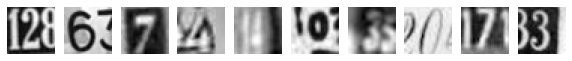

In [9]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % ((y_train[0:10][i])))
plt.show()

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(60000, 32, 32)
(60000,)
(18000, 32, 32)
(18000,)


**Training data has 42000, Valuation set has 60000 and test set has 18000 datasets**

<p><strong><span style="color: rgb(41, 105, 176); font-size: 20px;">Reshape and normalize the train and test features </span></strong></p>

In [11]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_val = X_val.reshape(60000, 1024)
print(X_val.shape)

(42000, 1024)
(60000, 1024)


In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.max())
print(X_train.min())
print(X_test.max())
print(X_test.min())


254.9745
0.0
254.9745
0.0


In [13]:
X_train /= 255
X_test /= 255

In [14]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (42000, 1024)
X_test shape: (18000, 32, 32)
Images in X_train: 42000
Images in X_test: 18000


<p><strong><span style="color: rgb(41, 105, 176); font-size: 20px;">One hot encode the labels for train and test data</span></strong></p>

In [15]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<p><strong><span style="color: rgb(41, 105, 176); font-size: 20px;">Define the model architecture using TensorFlow with a flatten layer followed by dense layers with
activation as ReLu and softmax</span></strong></p>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 100
    output_nodes = 10
        
    model = Sequential([
          tensorflow.keras.layers.Flatten(),
          tensorflow.keras.layers.Dense(1)
])
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    adam=optimizers.Adam(learning_rate=0.001,    beta_1=0.9,    beta_2=0.999,    epsilon=1e-08)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=100, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

<p><strong><span style="color: rgb(41, 105, 176); font-size: 20px;">Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation</span></strong></p>

In [17]:
lr = 0.00001
Lambda = 0
train_and_test_loop(10, lr, Lambda)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/10
42000/42000 [==============================] - 2s 59us/sample - loss: 2.2239 - acc: 0.1454
Epoch 2/10
42000/42000 [==============================] - 2s 52us/sample - loss: 2.1345 - acc: 0.1714
Epoch 3/10
42000/42000 [==============================] - 2s 53us/sample - loss: 2.1232 - acc: 0.1719
Epoch 4/10
42000/42000 [==============================] - 2s 52us/sample - loss: 2.1183 - acc: 0.17321s - lo
Epoch 5/10
42000/42000 [==============================] - 2s 55us/sample - loss: 2.1168 - acc: 0.1747
Epoch 6/10
42000/42000 [==============================] - 3s 69us/sample - loss: 2.1154 - acc: 0.1729
Epoch 7/10
42000/42000 [==============================] - 3s 73us/sample - loss: 2.1089 - acc: 0.1743
Epoch 8/10
42000/42000 [==============================] - 3s 65us/sample - loss: 2.1092 - acc: 0.1729
Epoch 9/10
42000/42000 [==============================] - 3

[2.1006364103953046, 0.1787619]

In [18]:
lr = 0.00001
Lambda = 1e-3
train_and_test_loop(10, lr, Lambda)

Epoch 1/10
42000/42000 [==============================] - 3s 75us/sample - loss: 2.2873 - acc: 0.1184
Epoch 2/10
42000/42000 [==============================] - 3s 68us/sample - loss: 2.1572 - acc: 0.1787
Epoch 3/10
42000/42000 [==============================] - 3s 60us/sample - loss: 2.1432 - acc: 0.1819
Epoch 4/10
42000/42000 [==============================] - 3s 78us/sample - loss: 2.1310 - acc: 0.1812
Epoch 5/10
42000/42000 [==============================] - 3s 78us/sample - loss: 2.1275 - acc: 0.1751
Epoch 6/10
42000/42000 [==============================] - 3s 75us/sample - loss: 2.1201 - acc: 0.1764
Epoch 7/10
42000/42000 [==============================] - 3s 76us/sample - loss: 2.1160 - acc: 0.1754
Epoch 8/10
42000/42000 [==============================] - 3s 71us/sample - loss: 2.1147 - acc: 0.1746
Epoch 9/10
42000/42000 [==============================] - 3s 68us/sample - loss: 2.1087 - acc: 0.1762
Epoch 10/10
42000/42000 [==============================] - 3s 74us/sample - loss: 

[2.0994194094794136, 0.1777619]

In [19]:
lr = 0.001
Lambda = 0
train_and_test_loop(50, lr, Lambda)

Epoch 1/50
42000/42000 [==============================] - 3s 77us/sample - loss: 2.2499 - acc: 0.1283
Epoch 2/50
42000/42000 [==============================] - 3s 75us/sample - loss: 2.1364 - acc: 0.1701
Epoch 3/50
42000/42000 [==============================] - 3s 71us/sample - loss: 2.1189 - acc: 0.1681
Epoch 4/50
42000/42000 [==============================] - 3s 67us/sample - loss: 2.1080 - acc: 0.1732
Epoch 5/50
42000/42000 [==============================] - 3s 69us/sample - loss: 2.1025 - acc: 0.1758
Epoch 6/50
42000/42000 [==============================] - 3s 68us/sample - loss: 2.1013 - acc: 0.1760
Epoch 7/50
42000/42000 [==============================] - 3s 60us/sample - loss: 2.1002 - acc: 0.1782
Epoch 8/50
42000/42000 [==============================] - 3s 74us/sample - loss: 2.0967 - acc: 0.1767
Epoch 9/50
42000/42000 [==============================] - 3s 69us/sample - loss: 2.0933 - acc: 0.1795
Epoch 10/50
42000/42000 [==============================] - 3s 62us/sample - loss: 

[2.06241330746242, 0.19390476]

<p><strong><span style="color: rgb(41, 105, 176); font-size: 20px;">Fit and evaluate the model. Print the loss and accuracy for the test data</span></strong></p>

In [20]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42000/42000 [==============================] - 3s 70us/sample - loss: 2.2255 - acc: 0.1385
Epoch 2/100
42000/42000 [==============================] - 3s 60us/sample - loss: 2.1454 - acc: 0.1661
Epoch 3/100
42000/42000 [==============================] - 3s 70us/sample - loss: 2.1220 - acc: 0.1733
Epoch 4/100
42000/42000 [==============================] - 3s 82us/sample - loss: 2.1181 - acc: 0.1747
Epoch 5/100
42000/42000 [==============================] - 3s 80us/sample - loss: 2.1174 - acc: 0.1765
Epoch 6/100
42000/42000 [==============================] - 3s 77us/sample - loss: 2.1130 - acc: 0.1771
Epoch 7/100
42000/42000 [==============================] - 3s 71us/sample - loss: 2.1109 - acc: 0.1790
Epoch 8/100
42000/42000 [==============================] - 3s 64us/sample - loss: 2.1106 - acc: 0.1829
Epoch 9/100
42000/42000 [==============================] - 3s 76us/sample - loss: 2.1089 - acc: 0.1823
Epoch 10/100
42000/42000 [==============================] - 3s 79us/sampl

In [21]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42000/42000 [==============================] - 3s 60us/sample - loss: 2.2007 - acc: 0.1545
Epoch 2/100
42000/42000 [==============================] - 3s 62us/sample - loss: 2.1006 - acc: 0.18600s - loss: 2.1012
Epoch 3/100
42000/42000 [==============================] - 2s 56us/sample - loss: 2.0913 - acc: 0.1828
Epoch 4/100
42000/42000 [==============================] - 3s 72us/sample - loss: 2.0875 - acc: 0.1849
Epoch 5/100
42000/42000 [==============================] - 2s 58us/sample - loss: 2.0830 - acc: 0.1866
Epoch 6/100
42000/42000 [==============================] - 2s 50us/sample - loss: 2.0835 - acc: 0.1863
Epoch 7/100
42000/42000 [==============================] - 2s 54us/sample - loss: 2.0791 - acc: 0.1844
Epoch 8/100
42000/42000 [==============================] - 2s 58us/sample - loss: 2.0796 - acc: 0.1898
Epoch 9/100
42000/42000 [==============================] - 2s 54us/sample - loss: 2.0749 - acc: 0.1878
Epoch 10/100
42000/42000 [==============================

**All acuracy is not increasing above 20%**

<p><strong><span style="color: rgb(41, 105, 176); font-size: 20px;">----------------------------------------------------Thank You------------------------------------------------------------------------</span></strong></p>